In [16]:
# !pip install scikit-learn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Windows용 한글 폰트 설정 (맑은 고딕)
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 한글폰트 예시

plt.rcParams['axes.unicode_minus'] = True  # 음수 기호 제대로 표시 설정

import warnings
warnings.filterwarnings('ignore')

tm=연도월일시

line=호선 / station_number: 역 번호 / station_name: 역명 / direction: 상/하행

stn: ??

ta: 기온 / wd: 풍향 / ws: 풍속

rn_day: 일 강수량 / rn_hr1: 1시간 강수량

hm: 상대습도/ si: 일조량 / ta_chi: 체감 온도

congestion: 혼잡도(높을수록 혼잡)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('train_subway22.csv')  # 파일 경로에 맞게 수정

# 데이터 상위 5개 행 확인
df.head()

,Unnamed: 0,train_subway22.tm,train_subway22.line,train_subway22.station_number,train_subway22.station_name,train_subway22.direction,train_subway22.stn,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
0,1,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,0.0,34.0,-99.0,-12.8,0
1,2,2022010101,1,150,서울역,상선,419,-9.4,39.4,2.0,0.0,0.0,35.8,-99.0,-10.4,0
2,3,2022010105,1,150,서울역,상선,419,-9.7,350.9,0.9,0.0,0.0,44.5,-99.0,-10.8,2
3,4,2022010106,1,150,서울역,상선,419,-9.4,139.6,0.5,0.0,0.0,43.4,-99.0,-11.0,5
4,5,2022010107,1,150,서울역,상선,419,-10.1,173.6,2.7,0.0,0.0,49.2,-99.0,-10.9,4


In [5]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396200 entries, 0 to 5396199
Data columns (total 16 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   train_subway22.tm              int64  
 2   train_subway22.line            int64  
 3   train_subway22.station_number  int64  
 4   train_subway22.station_name    object 
 5   train_subway22.direction       object 
 6   train_subway22.stn             int64  
 7   train_subway22.ta              float64
 8   train_subway22.wd              float64
 9   train_subway22.ws              float64
 10  train_subway22.rn_day          float64
 11  train_subway22.rn_hr1          float64
 12  train_subway22.hm              float64
 13  train_subway22.si              float64
 14  train_subway22.ta_chi          float64
 15  train_subway22.congestion      int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 658.7+ MB


In [6]:
# 기술 통계 확인
df.describe(include='all')

,Unnamed: 0,train_subway22.tm,train_subway22.line,train_subway22.station_number,train_subway22.station_name,train_subway22.direction,train_subway22.stn,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
count,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06,5396200,5396200,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06,5.396200e+06
unique,NaN,NaN,NaN,NaN,321,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,종로3가,하선,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,44226,2373777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.698100e+06,2.022067e+09,4.158755e+00,1.749056e+03,NaN,NaN,4.287919e+02,1.293762e+01,1.858036e+02,7.755702e-01,9.206986e-01,-1.448317e+00,6.111526e+01,-3.617791e+01,1.404835e+01,2.086400e+01
std,1.557749e+06,3.395293e+04,2.212536e+00,1.205034e+03,NaN,NaN,1.402875e+02,1.459800e+01,1.056132e+02,9.707567e+00,1.788385e+01,1.280515e+01,2.519223e+01,4.840952e+01,1.223503e+01,1.900467e+01
min,1.000000e+00,2.022010e+09,1.000000e+00,1.500000e+02,NaN,NaN,9.800000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,1.349051e+06,2.022041e+09,2.000000e+00,4.110000e+02,NaN,NaN,4.070000e+02,4.800000e+00,9.740000e+01,8.000000e-01,0.000000e+00,0.000000e+00,4.590000e+01,-9.900000e+01,4.700000e+00,7.000000e+00
50%,2.698100e+06,2.022070e+09,4.000000e+00,1.910000e+03,NaN,NaN,4.190000e+02,1.530000e+01,2.029000e+02,1.400000e+00,0.000000e+00,0.000000e+00,6.190000e+01,1.500000e-01,1.560000e+01,1.700000e+01
75%,4.047150e+06,2.022093e+09,6.000000e+00,2.636000e+03,NaN,NaN,4.350000e+02,2.330000e+01,2.755000e+02,2.300000e+00,0.000000e+00,0.000000e+00,7.890000e+01,1.220000e+00,2.460000e+01,2.900000e+01


In [7]:
# 결측치 확인 -> 결측치 없음
df.isnull().sum()

Unnamed: 0                       0
train_subway22.tm                0
train_subway22.line              0
train_subway22.station_number    0
train_subway22.station_name      0
train_subway22.direction         0
train_subway22.stn               0
train_subway22.ta                0
train_subway22.wd                0
train_subway22.ws                0
train_subway22.rn_day            0
train_subway22.rn_hr1            0
train_subway22.hm                0
train_subway22.si                0
train_subway22.ta_chi            0
train_subway22.congestion        0
dtype: int64

In [8]:
# 중복 데이터 확인
df.duplicated().sum()

0

In [9]:
# 각 컬럼별 데이터 타입 확인
df.dtypes

Unnamed: 0                         int64
train_subway22.tm                  int64
train_subway22.line                int64
train_subway22.station_number      int64
train_subway22.station_name       object
train_subway22.direction          object
train_subway22.stn                 int64
train_subway22.ta                float64
train_subway22.wd                float64
train_subway22.ws                float64
train_subway22.rn_day            float64
train_subway22.rn_hr1            float64
train_subway22.hm                float64
train_subway22.si                float64
train_subway22.ta_chi            float64
train_subway22.congestion          int64
dtype: object

In [10]:
# 범주형 변수 고유값 확인
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()}개 - {df[col].unique()[:5]}...")

train_subway22.station_name: 321개 - ['서울역' '시청' '종각' '종로3가' '종로5가']...
train_subway22.direction: 4개 - ['상선' '하선' '내선' '외선']...


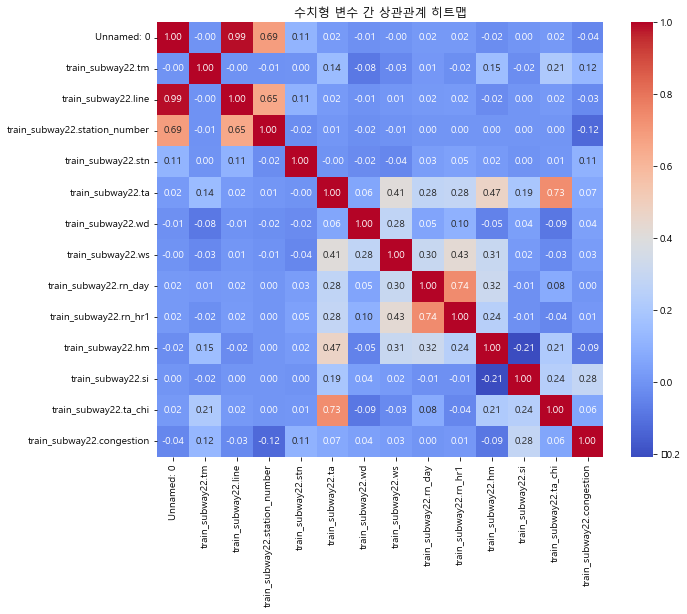

In [11]:
# 수치형 변수 간 상관관계 히트맵
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("수치형 변수 간 상관관계 히트맵")
plt.show()

다중공선성: (일 강수량, 1h 강수량) - 0.74

강한 상관관계(+): (호선, 역 번호), (기온, 체감온도)

중간 상관관계(+): (기온, 풍속), (기온, 상대습도), (풍속, 일강수량), (풍속, 1h강수량), (풍속, 상대습도), (일강수량, 상대습도)

약한 상관관계(+): (일시, 상대습도), (일시, 체감온도), (기온, 1h강수량), (기온, 일강수량), (기온, 일조량), (풍향, 풍속), (1h강수량, 상대습도), (상대습도, 체감온도), (일조량, 체감온도), (일조량, 혼잡도)

약한 상관관계(-): (상대습도, 일조량), (혼잡도, 역 번호), (

**강한 상관관계: |0.5| 이상
**중간 상관관계: |0.3|-|0.5|
**약한 상관관계(+): |0.15|-|0.3|
**unnamed:0 제외


<AxesSubplot:xlabel='train_subway22.ta', ylabel='Count'>

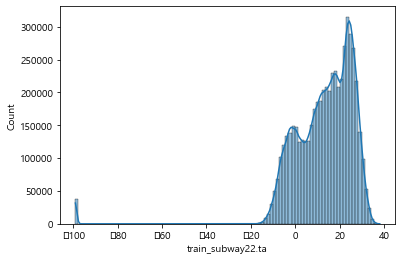

In [17]:
sns.histplot(data=df, x="train_subway22.ta", bins=100, kde=True)